## 目标
用三次多项式
$$y=a+bx+cx^2+dx^3$$
拟合正弦函数
$$y=sin(x)$$

## 基于Numpy的实现

In [88]:
# -*- coding: utf-8 -*-
import numpy as np

# Create random input and output data
x = np.linspace(-np.pi, np.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 7638.627443618707
199 5204.645753544497
299 3551.1448362790447
399 2426.6073673867722
499 1660.9564774284845
599 1139.0657094996568
699 782.9231223392459
799 539.6096955879711
899 373.18898276507315
999 259.23016433362284
1099 181.10575821852896
1199 127.4864027364426
1299 90.6438902462152
1399 65.30046491060435
1499 47.847693802932085
1599 35.815631684495564
1699 27.511677037979094
1799 21.774597668044994
1899 17.806807699911932
1999 15.059871218986792
Result: y = -0.07139125779963945 + 0.8167351009746858 x + 0.012316179926095317 x^2 + -0.0876399206000693 x^3


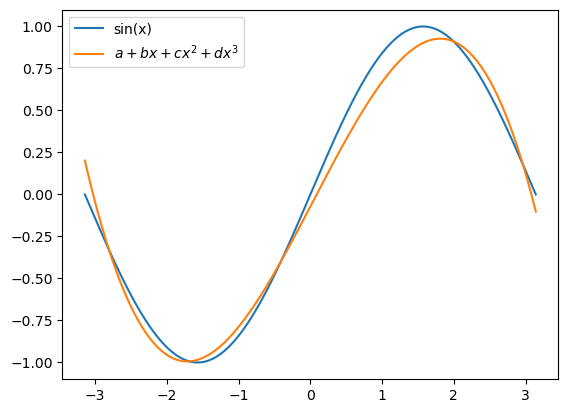

In [89]:
import matplotlib.pyplot as plt

plt.plot(x, y, label="sin(x)")
y_pred = a + b * x + c * x ** 2 + d * x ** 3
plt.plot(x, y_pred, label="$a+bx+cx^2+dx^3$")
plt.legend();

## 把PyTorch当Numpy用

但是，计算可以迁移到GPU，提高速度。

In [90]:
# -*- coding: utf-8 -*-

import torch
import numpy as np


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-np.pi, np.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')


99 tensor(128.3943)
199 tensor(92.4283)
299 tensor(67.3195)
399 tensor(49.7766)
499 tensor(37.5113)
599 tensor(28.9303)
699 tensor(22.9231)
799 tensor(18.7152)
899 tensor(15.7659)
999 tensor(13.6977)
1099 tensor(12.2466)
1199 tensor(11.2279)
1299 tensor(10.5125)
1399 tensor(10.0098)
1499 tensor(9.6565)
1599 tensor(9.4081)
1699 tensor(9.2333)
1799 tensor(9.1103)
1899 tensor(9.0237)
1999 tensor(8.9627)
Result: y = -0.01239804271608591 + 0.853926956653595 x + 0.00213886727578938 x^2 + -0.0929301306605339 x^3


## PyTorch实现autograd

In [92]:
# -*- coding: utf-8 -*-
import torch
import numpy as np

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-np.pi, np.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1954.13330078125
199 1380.380859375
299 976.0733032226562
399 691.093994140625
499 490.1744384765625
599 348.4873352050781
699 248.54844665527344
799 178.04226684570312
899 128.29119873046875
999 93.1789779663086
1099 68.39429473876953
1199 50.89655303955078
1299 38.54151916503906
1399 29.81647300720215
1499 23.654098510742188
1599 19.30116844177246
1699 16.22603416442871
1799 14.053339958190918
1899 12.518106460571289
1999 11.433204650878906
Result: y = -0.05370230972766876 + 0.8504398465156555 x + 0.009264539927244186 x^2 + -0.09243413060903549 x^3


## PyTorch中的神经网络预制件

In [93]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 857.62158203125
199 579.6646118164062
299 393.06622314453125
399 267.6969909667969
499 183.39468383789062
599 126.65789794921875
699 88.4386215209961
799 62.669471740722656
899 45.27796936035156
999 33.52910232543945
1099 25.584091186523438
1199 20.20584487915039
1299 16.561344146728516
1399 14.089028358459473
1499 12.410046577453613
1599 11.268594741821289
1699 10.491681098937988
1799 9.962320327758789
1899 9.601202964782715
1999 9.35457992553711
Result: y = -0.0180004071444273 + 0.8414257168769836 x + 0.0031053691636770964 x^2 + -0.09115194529294968 x^3


## PyTorch自动实现不同的梯度下降算法

In [97]:
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-6
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 482.89398193359375
199 323.5222473144531
299 217.7808074951172
399 147.6064910888672
499 101.02472686767578
599 70.09587860107422
699 49.5545654296875
799 35.90818786621094
899 26.839712142944336
999 20.81142807006836
1099 16.802766799926758
1199 14.136125564575195
1299 12.36159896850586
1399 11.180194854736328
1499 10.393360137939453
1599 9.869072914123535
1699 9.519573211669922
1799 9.286467552185059
1899 9.130913734436035
1999 9.027058601379395
Result: y = 0.006430497858673334 + 0.8439556360244751 x + -0.00110936863347888 x^2 + -0.0915118008852005 x^3


In [98]:
import torchvision

In [99]:
mnist_train = torchvision.datasets.MNIST("mnist", train=True, download=True)

In [109]:
transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])

In [110]:
mnist_train.transform = transform

In [112]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=20, shuffle=True)

In [113]:
examples = enumerate(train_loader)

In [116]:
idx, (data, targets) = next(examples)

In [117]:
idx

1

In [119]:
targets

tensor([4, 1, 2, 3, 0, 7, 2, 6, 9, 0, 7, 2, 5, 0, 1, 2, 0, 7, 7, 8])

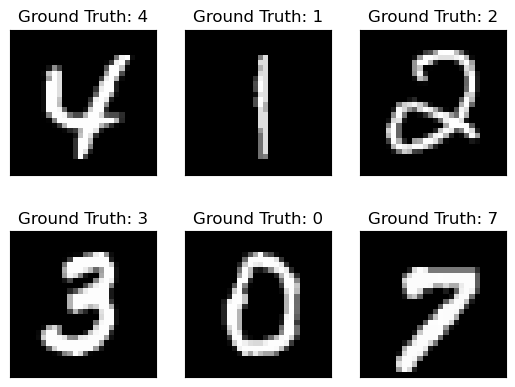

In [120]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(targets[i]))
  plt.xticks([])
  plt.yticks([])

In [51]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [121]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [122]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.02,
                      momentum=0.5)

In [123]:
train_losses = []
train_counter = []

In [124]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            torch.save(network.state_dict(), 'results/model.pth')
            torch.save(optimizer.state_dict(), 'results/optimizer.pth')
        train_losses.append(loss.item())
        train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [125]:
train(0)

/tmp/ipykernel_3186/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.301224
Train Epoch: 0 [2000/60000 (3%)]	Loss: 1.181372
Train Epoch: 0 [4000/60000 (7%)]	Loss: 1.317774
Train Epoch: 0 [6000/60000 (10%)]	Loss: 0.759591
Train Epoch: 0 [8000/60000 (13%)]	Loss: 0.840312
Train Epoch: 0 [10000/60000 (17%)]	Loss: 0.516232
Train Epoch: 0 [12000/60000 (20%)]	Loss: 0.193319
Train Epoch: 0 [14000/60000 (23%)]	Loss: 0.294653
Train Epoch: 0 [16000/60000 (27%)]	Loss: 0.822021
Train Epoch: 0 [18000/60000 (30%)]	Loss: 0.264427
Train Epoch: 0 [20000/60000 (33%)]	Loss: 0.648000
Train Epoch: 0 [22000/60000 (37%)]	Loss: 0.473875
Train Epoch: 0 [24000/60000 (40%)]	Loss: 0.159054
Train Epoch: 0 [26000/60000 (43%)]	Loss: 0.141553
Train Epoch: 0 [28000/60000 (47%)]	Loss: 0.503017
Train Epoch: 0 [30000/60000 (50%)]	Loss: 0.259760
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.328816
Train Epoch: 0 [34000/60000 (57%)]	Loss: 0.944306
Train Epoch: 0 [36000/60000 (60%)]	Loss: 0.373824
Train Epoch: 0 [38000/60000 (63%)]	Loss: 0.266584
Train Epoch

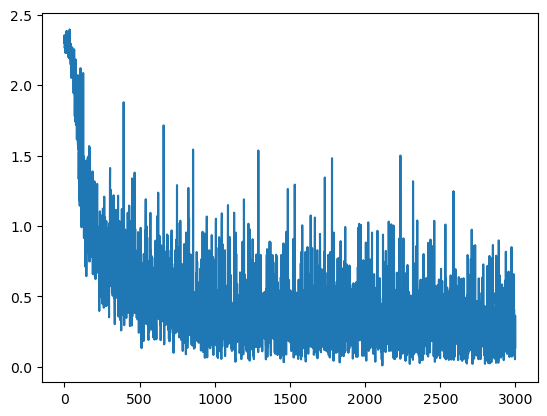

In [126]:
plt.plot(range(len(train_losses)), train_losses)

In [127]:
mnist_test = torchvision.datasets.MNIST("mnist", train=False, download=True)

In [128]:
mnist_test.transform = transform

In [129]:
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=20, shuffle=False)

In [130]:
mnist_test

Dataset MNIST
    Number of datapoints: 10000
    Root location: mnist
    Split: Test

In [131]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    #test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [132]:
test()

/tmp/ipykernel_3186/161431047.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/usr/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.0947, Accuracy: 9703/10000 (97%)



In [87]:
mnist_test

Dataset MNIST
    Number of datapoints: 10000
    Root location: mnist
    Split: Test

In [176]:
class UAF(nn.Module):
    def __init__(self):
        super(UAF, self).__init__()
        self.fc1 = nn.Linear(1, 5)
        self.fc2 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        return x

In [177]:
uaf = UAF()
optimizer = optim.Adam(uaf.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

In [178]:
def train_uaf():
    for i in range(2000):
        optimizer.zero_grad()
        output = uaf(x.unsqueeze(-1))
        loss = loss_fn(output, y.unsqueeze(-1))
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print(loss.item())
train_uaf()

1.2101858854293823
0.12678584456443787
0.09447889775037766
0.07539045065641403
0.061069898307323456
0.05257236957550049
0.04724368453025818
0.043462395668029785
0.04015655443072319
0.03627019375562668
0.03167499229311943
0.02739100530743599
0.021895308047533035
0.014871894381940365
0.00822339579463005
0.003963458351790905
0.0018981529865413904
0.0010277603287249804
0.0006527765071950853
0.0004640079860109836


In [179]:
y_pred = uaf(x.unsqueeze(-1))

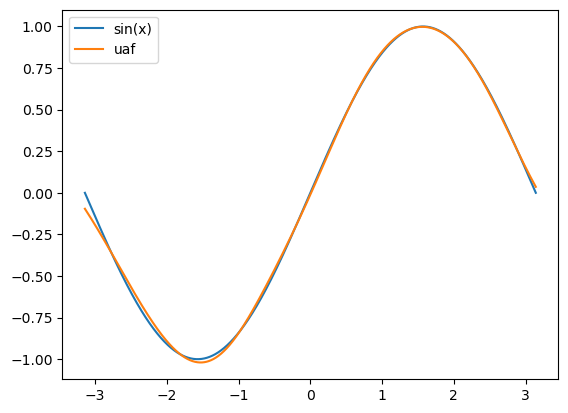

In [180]:
plt.plot(x, y, label="sin(x)")
plt.plot(x, y_pred.squeeze().detach().numpy(), label="uaf")
plt.legend()